In [1]:
%matplotlib inline
import os
import numpy as np
import re
from skimage.transform import resize
from skimage.color import rgb2gray
from matplotlib.pyplot import imread, imshow
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
images = []
for root, dirnames, filenames in os.walk("/Users/fnakstad/Dev/Datasets/flower_images"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = imread(filepath)
            image_resized = resize(image, (128, 128), mode='reflect')
            images.append(image_resized)

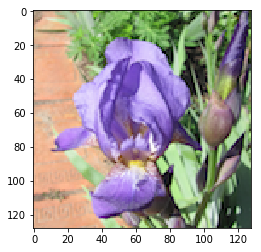

In [3]:
imshow(images[207])

In [4]:
images[207].shape

(128, 128, 4)

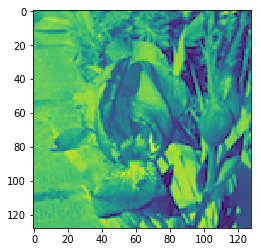

In [5]:
imshow(rgb2gray(images[207]))

In [6]:
rgb2gray(images[207]).shape

(128, 128)

In [7]:
images[207][0][0]

array([ 0.64705884,  0.57647061,  0.52156866,  1.        ])

In [8]:
rgb2gray(images[207])[0][0]

0.58751218144893713

In [9]:
labels = []
data = []
for image in images:
    #labels.append(image.reshape(-1, 4))
    labels.append(image.reshape(-1, 1))
    data.append(rgb2gray(image).reshape((-1, 1)))

In [10]:
data = np.array(data).reshape((210, -1))
labels = np.array(labels).reshape((210, -1))
print(data.shape)
print(labels.shape)

(210, 16384)
(210, 65536)


In [ ]:
model = Sequential()
model.add(Dense(16384, activation='relu', input_dim=16384))
model.add(Dense(32768, activation='relu'))
model.add(Dense(65536, activation='relu'))
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
model.fit(data, labels, epochs=10, batch_size=32)

Epoch 1/10


In [ ]:
result = model.predict(data[207].reshape((-1, 16384)))

In [ ]:
#images[207]
result.reshape((-1, 4))

In [ ]:
model.summary()